## Project Earthquake

### Group Members: Karthika Pai, Kathryn Chiang, An Qi Ma, Natalie Marcom

For our final STA 141B exploratory data science project, we have decided to focus on earthquakes. Though all four of us use significant datasets and analyze them in different ways, the crux of our datasets are from the [USGS Earthquake Database](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). With the skills we have learned from this class - most specifically, csv file reading; using libraries such as Basemap, Pandas, Numpy, Matplotlib and basic statistics, we hope to answer several questions we have about earthquakes. Each section will be preceded by the question it tries to answer, in bold.

In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import os

from mpl_toolkits.basemap import Basemap
%matplotlib inline

## Let's look at our dataset!

The dataset is a csv file that has been downloaded from the USGS Earthquake Database (shown above). This dataset represents significant earthquakes that have occured throughout the world from the years 1965 to 2016. A significant earthquake is one that has been determined by the USGS to meet the three following criteria:

1. mag_significance = magnitude * 100 * (magnitude / 6.5); 
2. pager_significance = (red) ? 2000 : (orange) ? 1000 : (yellow) ? 500 : 0; (PAGER is a USGS-internal measure)
3. dyfi_significance = min(num_responses, 1000) * max_cdi / 10; (Did you feel it - also known as dyfi - is a query that takes into account whether people perceived the earthquake or not. The higher the magnitude of the earthquake, the greater the dyfi significance)

significance = max(mag_significance, pager_significance) + dyfi_significance

Any event with a significance > 600 is considered a significant event and appears on the list.

In [2]:
directory = os.path.join(".", "query1.csv") # TA LOOK HERE - ASSUME THAT FRESH.CSV IS IN SAME DIRECTORY
eq = pd.read_csv(directory)

In [3]:
eq.head() #23412 total

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T23:48:13.270Z,32.969500,-115.553667,8.08,2.88,ml,42.0,74.0,0.06810,0.25,...,2017-02-08T19:44:55.400Z,"2km WSW of Brawley, CA",earthquake,0.23,0.69,0.172,79.0,reviewed,ci,ci
1,2016-12-31T23:25:27.120Z,32.974833,-115.538833,10.20,3.63,mw,47.0,77.0,0.07288,0.29,...,2017-02-08T20:51:22.367Z,"1km WSW of Brawley, CA",earthquake,0.29,0.61,NaN,4.0,reviewed,ci,ci
2,2016-12-31T23:13:51.730Z,32.976500,-115.551667,5.84,2.64,ml,38.0,74.0,0.06663,0.21,...,2017-02-08T21:06:15.414Z,"2km W of Brawley, CA",earthquake,0.19,0.46,0.144,60.0,reviewed,ci,ci
3,2016-12-31T23:06:56.130Z,32.975000,-115.545833,14.48,3.88,mw,49.0,76.0,0.06999,0.27,...,2017-02-08T21:56:22.247Z,"2km WSW of Brawley, CA",earthquake,0.26,0.51,NaN,4.0,reviewed,ci,ci
4,2016-12-31T22:58:12.930Z,32.977667,-115.545167,11.27,3.49,ml,45.0,76.0,0.06786,0.25,...,2017-02-08T20:38:24.139Z,"1km W of Brawley, CA",earthquake,0.25,0.45,0.149,282.0,reviewed,ci,ci


In [4]:
eq.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

This is certainly a large dataset! The file has records of over 23000 earthquakes (23000+ rows), the majority of whose magnitude is over 4.0 (precise statistics will be discussed later). It also has 21 features, such as latitude and longitude, the magnitude, depth and other features such as azimuthal gap and USGS-specific earthquake ID.

We don't need some features for our analysis, so let's include only the time, the data, the latitude and longitude, and the depth of the earthquake source to make our analysis simpler!

In [8]:
simple = eq[["time", "latitude","longitude","mag", "depth"]]

In [13]:
simple

,time,latitude,longitude,mag,depth
0,2016-12-31T23:48:13.270Z,32.969500,-115.553667,2.88,8.080
1,2016-12-31T23:25:27.120Z,32.974833,-115.538833,3.63,10.200
2,2016-12-31T23:13:51.730Z,32.976500,-115.551667,2.64,5.840
3,2016-12-31T23:06:56.130Z,32.975000,-115.545833,3.88,14.480
4,2016-12-31T22:58:12.930Z,32.977667,-115.545167,3.49,11.270
5,2016-12-31T22:52:55.090Z,32.974833,-115.547667,2.88,5.960
6,2016-12-31T22:52:04.680Z,32.968500,-115.545167,2.92,6.340
7,2016-12-31T22:46:01.150Z,32.970167,-115.546167,2.64,6.250
8,2016-12-31T22:42:26.150Z,32.971000,-115.549833,2.99,6.130
9,2016-12-31T22:41:26.530Z,32.974500,-115.548333,3.74,9.700


## What is a rough geographical distribution of our earthquake list? Are some areas more "cluttered" or concentrated than others?

In [10]:
m = Basemap(projection="mill")

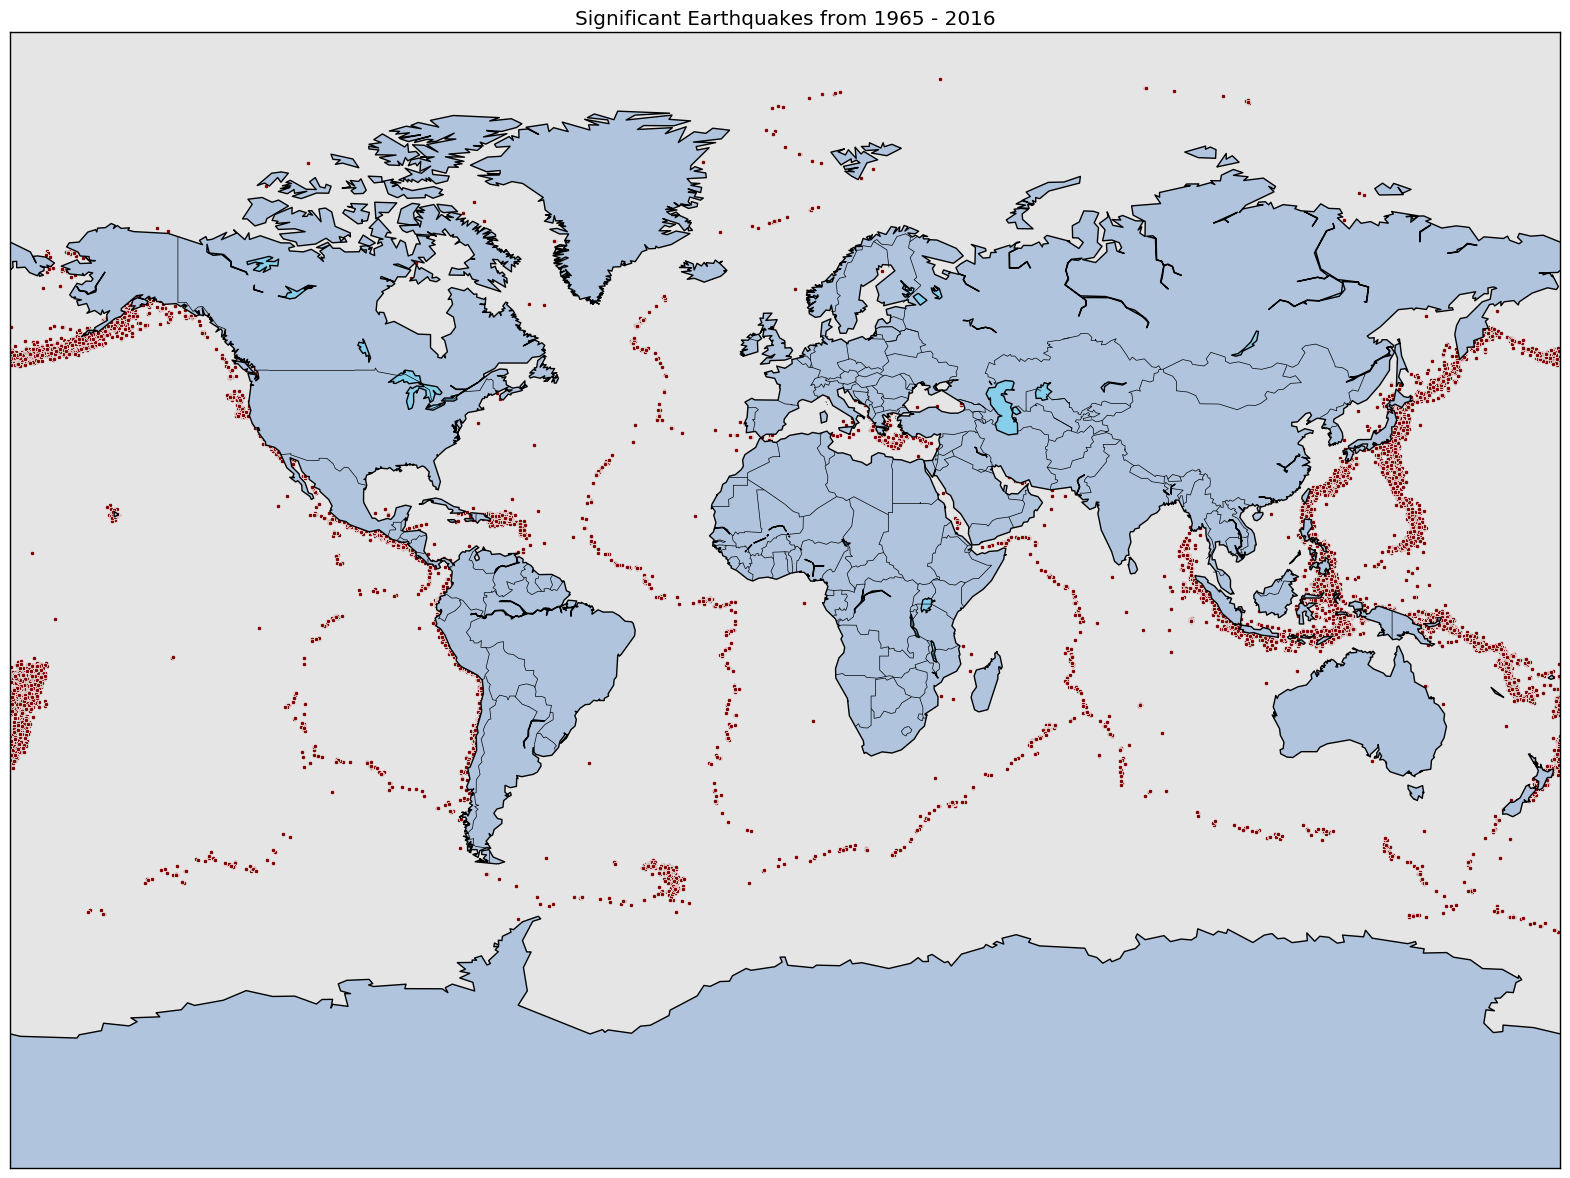

In [12]:
x,y = m([longs for longs in simple["longitude"]],
         [lats for lats in simple["latitude"]])
fig = plt.figure(figsize=(20,20))
plt.title("Significant Earthquakes from 1965 - 2016")
m.scatter(x,y, s = 10, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

It seems like earthquakes are distributed around naturally occuring fault lines in the earth's tectonic plates. Let's make the dots appear a bit larger in order to figure out which regions have the most concentration.

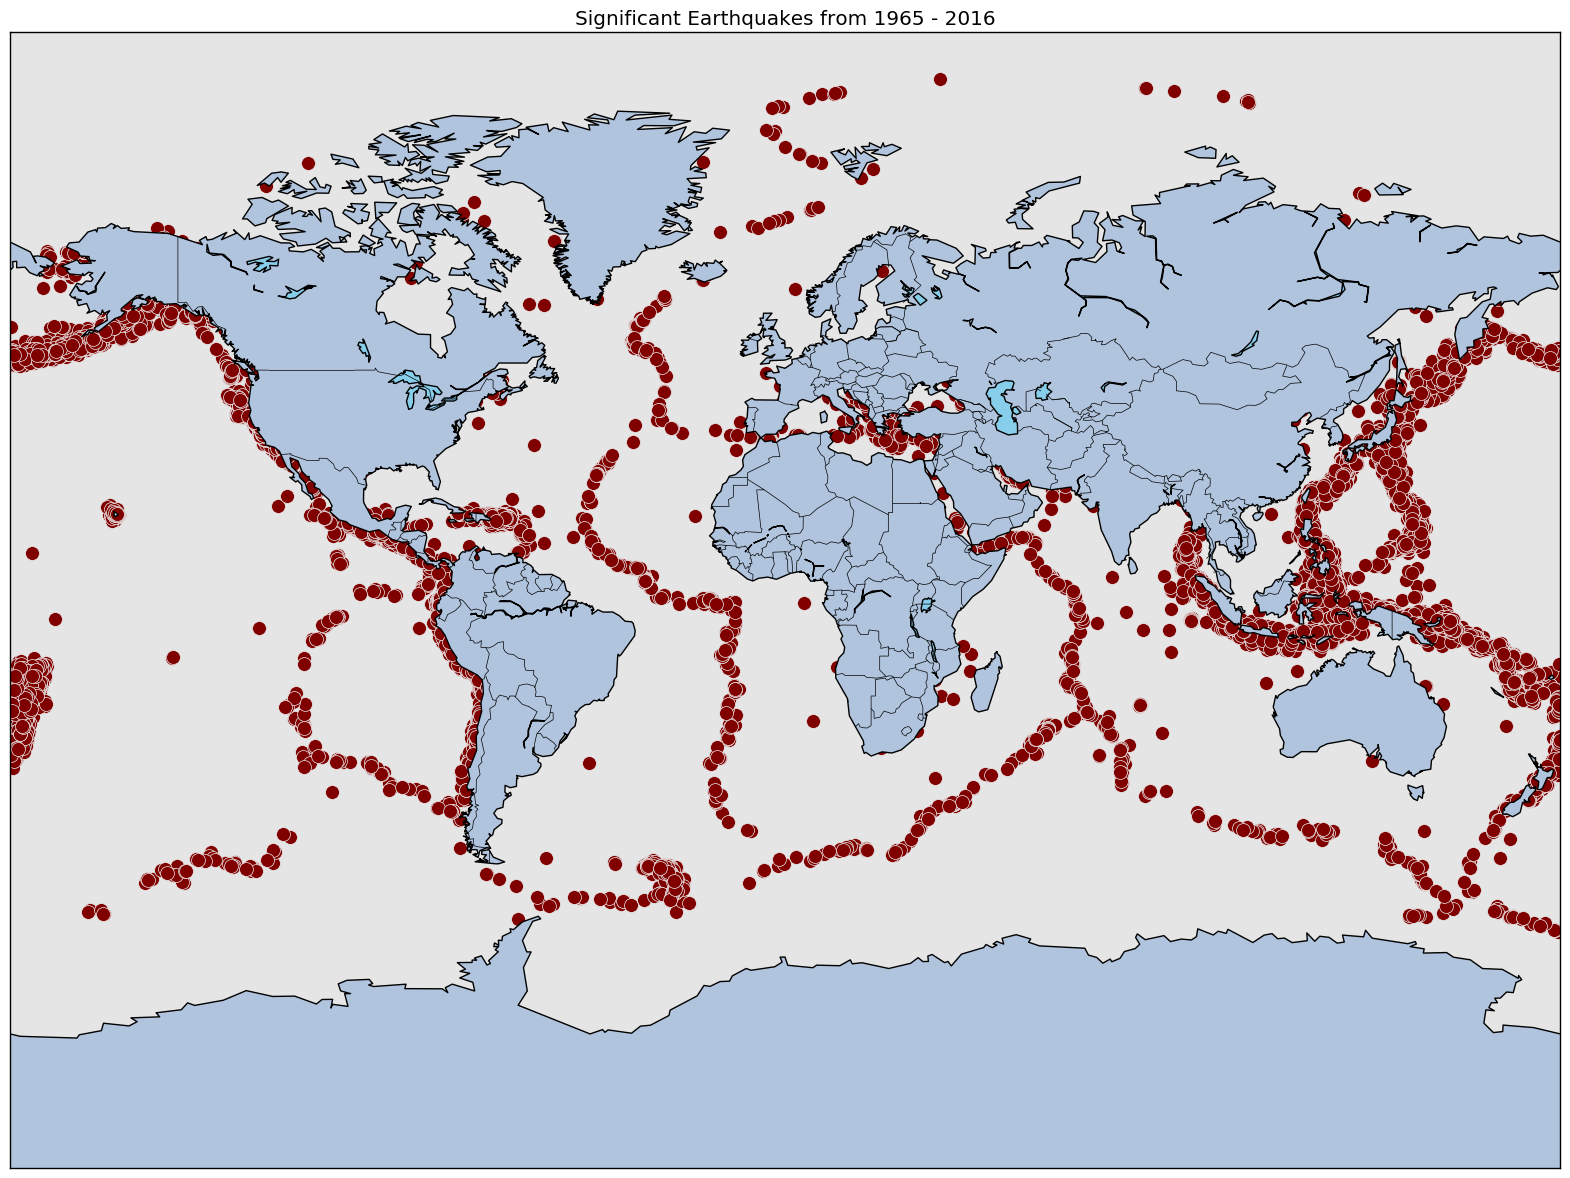

In [14]:
fig = plt.figure(figsize=(20,20))
plt.title("Significant Earthquakes from 1965 - 2016")
m.scatter(x,y, s = 100, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

It seems that majority of earthquakes are concentrated in the Indonesian, Sino Pacific and the Japanese area. Why is this so? Before we look at magnitude of earthquakes and how it relates to the geographical distribution of significant earthqauakes, let's try to answer this question. According to National Geographic, the Pacific Ring of Fire, technically called the Circum-Pacific belt, is the world's greatest earthquake belt, according to the U.S. Geological Survey (USGS), due to its series of fault lines stretching 25,000 miles (40,000 kilometers) from Chile in the Western Hemisphere through Japan and Southeast Asia. The magazine states that 
1. Roughly 90 percent of all the world's earthquakes, and 80 percent of the world's largest earthquakes, strike along the Ring of Fire
2. About 17 percent of the world's largest earthquakes and 5-6 percent of all quakes occur along the Alpide belt.

Are these statistics true? Let's find out!

I have the defined the Ring of Fire matrix to be the area of the world whose latitude is below 59.389 and above -45.783 and whose longitude is greater than -229.219 and below -65.391 degrees, (converted to about -70 to 120 on the Mercator projection). These values are obtained by drawing a rectangle that circumscribed the Ring of Fire area on the USGS interactive map.

In [16]:
rof_lat = [-61.270, 56.632]
rof_long = [-70, 120]

In [17]:
ringoffire = simple[((simple.latitude < rof_lat[1]) & 
                    (simple.latitude > rof_lat[0]) & 
                     ~((simple.longitude < rof_long[1]) & 
                       (simple.longitude > rof_long[0])))]

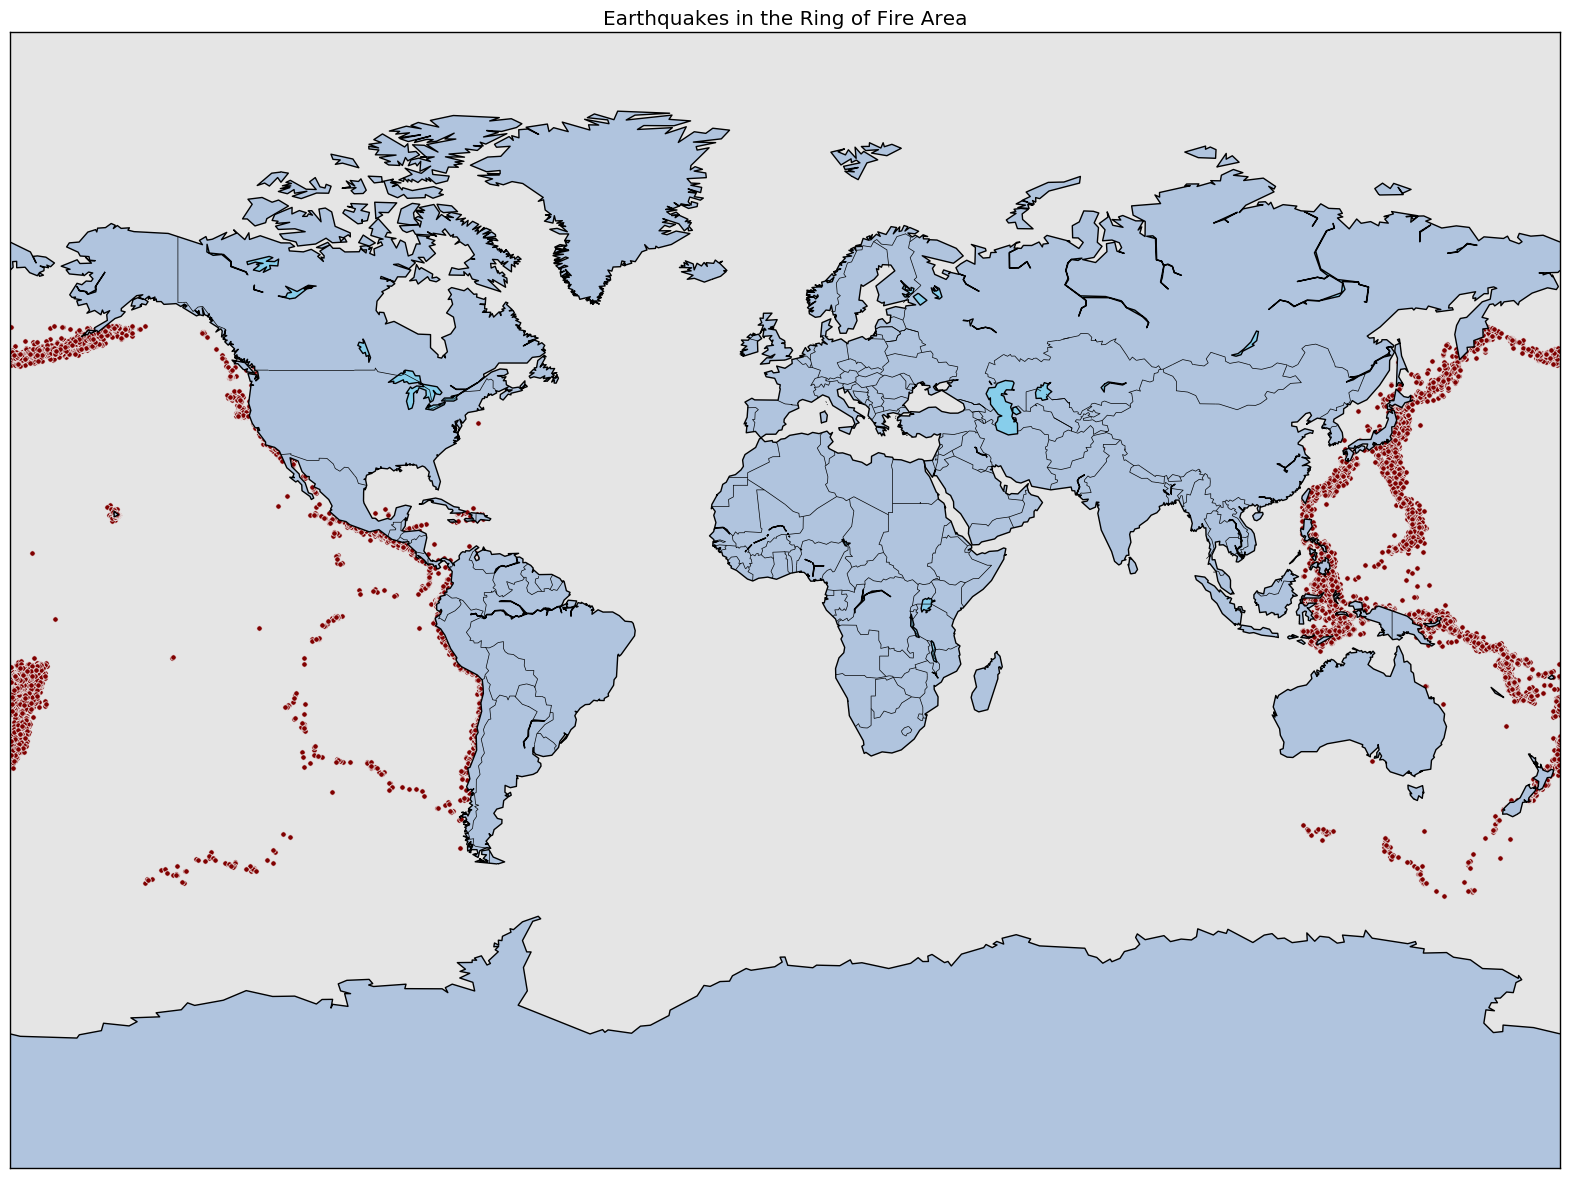

In [19]:
x,y = m([longs for longs in ringoffire["longitude"]],
         [lats for lats in ringoffire["latitude"]])
fig2 = plt.figure(figsize=(20,20))
plt.title("Earthquakes in the Ring of Fire Area")
m.scatter(x,y, s = 15, c = "maroon")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='lightsteelblue',lake_color='skyblue')

plt.show()

In [20]:
ringoffire

,time,latitude,longitude,mag,depth
0,2016-12-31T23:48:13.270Z,32.969500,-115.553667,2.88,8.080
1,2016-12-31T23:25:27.120Z,32.974833,-115.538833,3.63,10.200
2,2016-12-31T23:13:51.730Z,32.976500,-115.551667,2.64,5.840
3,2016-12-31T23:06:56.130Z,32.975000,-115.545833,3.88,14.480
4,2016-12-31T22:58:12.930Z,32.977667,-115.545167,3.49,11.270
5,2016-12-31T22:52:55.090Z,32.974833,-115.547667,2.88,5.960
6,2016-12-31T22:52:04.680Z,32.968500,-115.545167,2.92,6.340
7,2016-12-31T22:46:01.150Z,32.970167,-115.546167,2.64,6.250
8,2016-12-31T22:42:26.150Z,32.971000,-115.549833,2.99,6.130
9,2016-12-31T22:41:26.530Z,32.974500,-115.548333,3.74,9.700


There are 17596 earthquakes which are positioned solely in the ring of fire area. There were 23412 total large earthquakes in the entire dataset. So, frequency wise, about 75.1% of significant or largest earthquakes are in the Ring of Fire region. This is extremely close to the 80% figure cited in the National Geographic. 

## Magnitude Statistics

### What are some basic statistics (max, min, average etc) for the magnitudes of the entire dataset and the Ring of Fire earthquake subset?
### Which magnitudes occur the most frequently in both datasets?

In [22]:
minimum = simple["mag"].min()
maximum = simple["mag"].max()
average = simple["mag"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

('Minimum:', 2.5)
('Maximum:', 7.9000000000000004)
('Mean', 3.8955485980936304)


In [23]:
minimum = ringoffire["mag"].min()
maximum = ringoffire["mag"].max()
average = ringoffire["mag"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

('Minimum:', 2.5)
('Maximum:', 7.9000000000000004)
('Mean', 3.9639912331969267)


The minimum, maximum and average for both datasets are eerily close together! What does that mean? For one thing, the subset data (the Ring of Fire earthquakes) comprise almost 75% of the total data; this ensures that statistics for both datasets will be extremely similar. Secondly, and more importantly, the dataset contains only earthquakes that have more than 5.0 magnitude (significant ones). If the dataset included a list of all earthquakes, we would see that a concentration of the world's major earthquakes would be in the Ring of Fire area. We will do so later. 

In the meantime, let's continue to look at some simple statistics and correlations with magnitude.

Magnitude   Number of Occurence
5-6         6033.0
6-7         2595.0
7-8         1070.0
8-9         7961.0
9-10         5723.0
10-11         1223.0
11-12         322.0
12-13         100.0
13-14         30.0
14-15         9.0
15-16         7.0
16-17         0.0
17-18         0.0
18-19         0.0
19-20         0.0


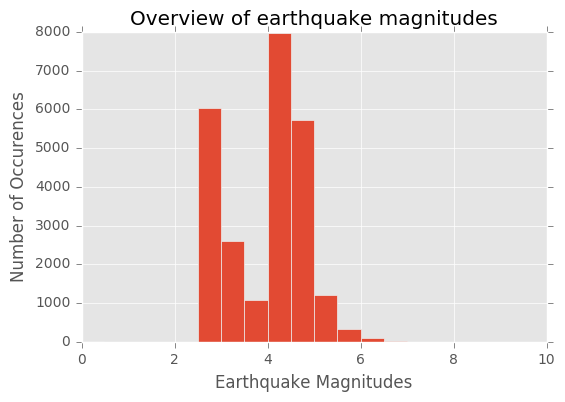

In [28]:
(n,bins, patches) = plt.hist(simple["mag"], range=(0,10), bins=20)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

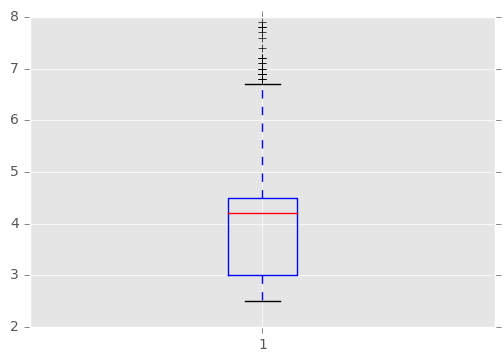

In [31]:
plt.boxplot(simple["mag"])
plt.show()

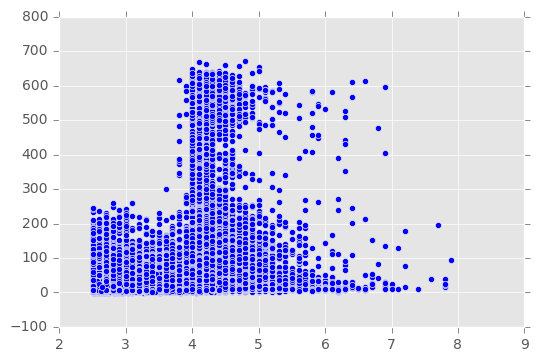

In [33]:
plt.scatter(simple["mag"],simple["depth"])

In [34]:
np.corrcoef(simple["mag"], simple["depth"])

array([[ 1.        ,  0.16630632],
       [ 0.16630632,  1.        ]])

## Time correlations
## Get normal datasets of ALL earthquakes in 2016 - compare to signficant. query1.csv